In [4]:
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [17]:
def read_dataframe(filename):
    df = pd.read_csv(filename)
    df.drop(['host_id','name','latitude','longitude','id','host_name','last_review', 'neighbourhood_group', 'license'], axis=1, inplace=True)
    df.dropna(subset=['price'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
    
    df = df[(df.price >= 1) & (df.price <= 201)]
    
    # Feature selection
    categorical = ['room_type', 'neighbourhood']
    df[categorical] = df[categorical].astype(str)

    return df

In [18]:
df_train = read_dataframe("datasets/airbnb-listings-may.csv")
df_val = read_dataframe("datasets/airbnb-listings-june.csv")

In [19]:
len(df_train), len(df_val)

(315, 334)

In [20]:
# Feature selection
numerical = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
categorical = ['room_type', 'neighbourhood']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [28]:
val_dicts[1]

{'room_type': 'Entire home/apt',
 'neighbourhood': 'SIXTH WARD',
 'minimum_nights': 2,
 'number_of_reviews': 302,
 'reviews_per_month': 2.53,
 'calculated_host_listings_count': 4,
 'availability_365': 253,
 'number_of_reviews_ltm': 16}

In [21]:
target = "price"
y_train = df_train[target].values
y_val = df_val[target].values

### LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

32.50037412768117

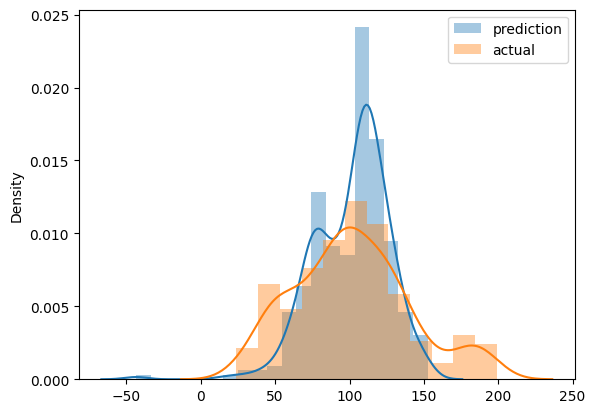

In [23]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [24]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [25]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

32.489422187765754